# ICT1508C Applied Statistics

*Linear Regression Using Python*

>Filename:     &emsp;&emsp;`ICT1508C_Topic06-6_Py-Lin-Regression_Lesson_v2025-1.1.ipynb`<br>
>Version:      &emsp;&emsp;&ensp; `2025-1.1`<br>
>Description:  &ensp;&ensp;Jupyter notebook for ICT1508C lesson on Linear Regression Using Python.<br>
>Module:       &emsp;&emsp;&ensp;ICT1508C<br>
>Type:         &emsp;&emsp;&emsp;&ensp; Lesson<br>
>Prepared by:  &ensp;Nicholas H L Wong<br>
>Organisation: &nbsp;Singapore Institute of Technology<br>
>Division:     &emsp;&emsp;&ensp;Infocomm Technology<br>
>Attribution:  &emsp;Copyright &copy; 2025 Nicholas H L Wong – All Rights Reserved<br>

## Setup

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

The dataset `ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv` contains data on Singapore Housing Development Board (HDB) resale flat prices for various units sold from January 2017 to the present.

Ref.: https://beta.data.gov.sg/collections/189/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view

*Note that while the reference contains data up to the present, the downloaded dataset used in this notebook only contains data up to March 2024.*

In [2]:
data_rs = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
data_rs

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
175835,2024-03,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,Maisonette,1988,63 years 04 months,830000.0
175836,2024-03,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,142.0,Apartment,1988,63 years 06 months,815000.0
175837,2024-03,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,63 years 05 months,820000.0
175838,2024-03,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 05 months,860000.0


Imagine that we are interested to buy a flat in Ang Mo Kio that is either a 4-room, a 5-room, or an executive unit. We wish to study how the resale price is affected by various features.

Let us filter the dataset to only include the observations of interest.

In [3]:
data_rs = data_rs[(data_rs['town']=="ANG MO KIO") & 
                  (data_rs['flat_type'].isin(["4 ROOM", "5 ROOM", "EXECUTIVE"]))]
data_rs

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
33,2017-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,61 years 06 months,400000.0
34,2017-01,ANG MO KIO,4 ROOM,475,ANG MO KIO AVE 10,07 TO 09,91.0,New Generation,1979,61 years 06 months,400000.0
35,2017-01,ANG MO KIO,4 ROOM,629,ANG MO KIO AVE 4,01 TO 03,94.0,New Generation,1981,63 years 09 months,403000.0
36,2017-01,ANG MO KIO,4 ROOM,546,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1981,63 years,410000.0
37,2017-01,ANG MO KIO,4 ROOM,131,ANG MO KIO AVE 3,01 TO 03,98.0,New Generation,1979,61 years 01 month,425888.0
...,...,...,...,...,...,...,...,...,...,...,...
173974,2024-03,ANG MO KIO,5 ROOM,259,ANG MO KIO AVE 2,22 TO 24,135.0,Model A,1982,57 years 02 months,970000.0
173975,2024-03,ANG MO KIO,5 ROOM,648,ANG MO KIO AVE 5,07 TO 09,121.0,Improved,1980,55 years 09 months,720000.0
173976,2024-03,ANG MO KIO,5 ROOM,648,ANG MO KIO AVE 5,01 TO 03,121.0,Improved,1980,55 years 09 months,653888.0
173977,2024-03,ANG MO KIO,5 ROOM,501,ANG MO KIO AVE 5,07 TO 09,121.0,Improved,1981,55 years 11 months,700000.0


## Simple Linear Regression

Suppose we want to know how the resale price is related by the floor area. We create variables containing the relevant data columns.

Because we will want to do prediction later, we select one observation (row) to use as a *test* observation. We use the remaining rows as a *training* dataset.

In [4]:
idx_test = 36                           # Index of test observation

# Create training dataset, excluding test observation
X_train = data_rs['floor_area_sqm'].drop([idx_test], axis=0)
y_train = data_rs['resale_price'].drop([idx_test], axis=0)

In [5]:
# Create testing dataset (in this case, one observation)
X_test = data_rs['floor_area_sqm'].loc[idx_test]
y_test = data_rs['resale_price'].loc[idx_test]
(X_test, y_test)

(92.0, 410000.0)

We can plot the data to visualise it.

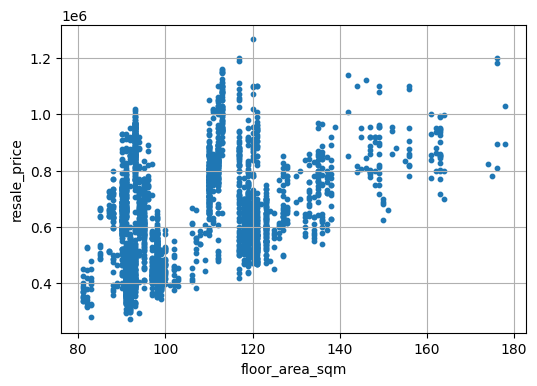

In [6]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot the data
ax.scatter(X_train, y_train, s=10)
ax.set_xlabel(X_train.name)
ax.set_ylabel(y_train.name)
ax.grid()
plt.show()

#### Q: Perform linear regression with `resale_price` as the dependent variable and `floor_area_sqm` as the independent variable.

##### Using `scipy.stats.linregress()`

In [7]:
from scipy import stats

Perform the regression:

In [8]:
lin_reg_1_sp = stats.linregress(X_train, y_train)
lin_reg_1_sp

LinregressResult(slope=5620.517365980074, intercept=19549.79244074016, rvalue=0.48758591884524444, pvalue=1.1106796496798256e-195, stderr=175.70073612518956, intercept_stderr=18423.89927812987)

Print out the regression coefficients and $r^2$-value:

In [9]:
print("Intercept:\t", lin_reg_1_sp.intercept)
print("Coefficient:\t", lin_reg_1_sp.slope)
print("r^2:\t\t", lin_reg_1_sp.rvalue**2)

Intercept:	 19549.79244074016
Coefficient:	 5620.517365980074
r^2:		 0.2377400282561613


##### Using `sklearn.linear_model.LinearRegression()`

We need to extract the values as numerical arrays. We also need to reshape the independent variable into a column vector.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_augm = X_train.values.reshape((-1, 1))
X_augm

array([[ 92.],
       [ 91.],
       [ 94.],
       ...,
       [121.],
       [121.],
       [113.]])

In [12]:
y_augm = y_train.values

Perform the regression:

In [13]:
lin_reg_1_sk = LinearRegression().fit(X_augm, y_augm)

Print out the regression coefficients and $r^2$-value:

In [14]:
print("Intercept:\t", lin_reg_1_sk.intercept_)
print("Coefficient:\t", lin_reg_1_sk.coef_.item())
print("r^2:\t\t", lin_reg_1_sk.score(X_augm, y_augm))

Intercept:	 19549.792440741905
Coefficient:	 5620.517365980058
r^2:		 0.2377400282561617


##### Using `statsmodels.regression.linear_model.OLS()`

In [15]:
import statsmodels.api as sm

To include the intercept, we need to explicitly include a column of ones.

In [16]:
X_augm = sm.add_constant(X_train)       # Add a column of ones
X_augm

,const,floor_area_sqm
33,1.0,92.0
34,1.0,91.0
35,1.0,94.0
37,1.0,98.0
38,1.0,97.0
...,...,...
173974,1.0,135.0
173975,1.0,121.0
173976,1.0,121.0
173977,1.0,121.0


Perform the regression:

In [17]:
lin_reg_1_sm = sm.OLS(y_train, X_augm).fit()

Print out the regression coefficients and $r^2$-value:

In [18]:
print("Intercept and coefficient:\n", lin_reg_1_sm.params)
print("\nr^2:\t\t", lin_reg_1_sm.rsquared)

Intercept and coefficient:
 const             19549.792441
floor_area_sqm     5620.517366
dtype: float64

r^2:		 0.23774002825616158


Display the regression results summary:

In [19]:
print(lin_reg_1_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1023.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.11e-195
Time:                        00:58:02   Log-Likelihood:                -44045.
No. Observations:                3283   AIC:                         8.809e+04
Df Residuals:                    3281   BIC:                         8.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.955e+04   1.84e+04      1.

#### Q: Interpret the coefficient for `floor_area_sqm`.

For each 1 sqm increase in the floor area, the resale price will increase by about $5,620.52.

#### Q: Interpret the $r^2$-value.

About 23.8% of the variability in the resale price is explained by the floor area.

#### Q: Plot the data with the fitted regression line. Include a legend.

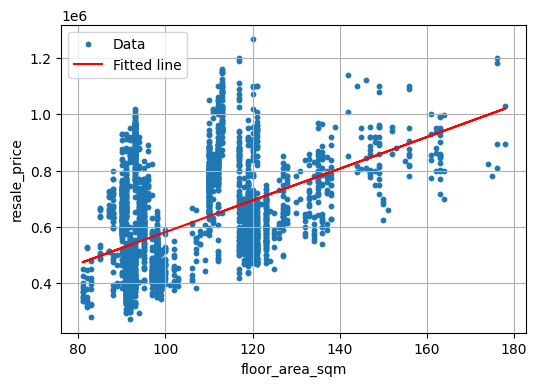

In [20]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot the data
ax.scatter(X_train, y_train, s=10, label="Data")

# Plot the regression line
ax.plot(X_train, lin_reg_1_sm.params.iloc[0] + lin_reg_1_sm.params.iloc[1]*X_train, 'r', label='Fitted line')

# Add axis labels, legend, and grid
ax.set_xlabel(X_train.name)
ax.set_ylabel(y_train.name)
ax.legend()
ax.grid()
plt.show()

*Pro tip: To plot the regression line obtained from the other linear regression methods mentioned above, we just need to extract the intercept and coefficient accordingly.*

#### Q: Predict what the resale price will be for a unit with a floor area of 92.0 sqm (i.e., the floor area of the test observation).

##### Using `scipy.stats.linregress()`

We extract the regression coefficients and apply the regression equation:
$$
  \textsf{resale\_price} = \beta_0 + \beta_1\times92.0
$$

In [21]:
lin_reg_1_sp.intercept + lin_reg_1_sp.slope * X_test

536637.3901109069

We predict that a resale unit in Ang Mo Kio, of 92.0 sqm, will cost about $536,637.39.

We can compare this with the true price for this floor area.

*Pro tip: We used a known observation as our prediction test case for pedagogical reasons. Of course in real life, the true value of the dependent variable for a new prediction will be unknown.*

In [22]:
y_test

410000.0

##### Using `sklearn.linear_model.LinearRegression()`

In [23]:
lin_reg_1_sk.predict(X_test.reshape(-1, 1)).item()

536637.3901109071

##### Using `statsmodels.regression.linear_model.OLS()`

In [24]:
lin_reg_1_sm.predict(sm.add_constant(X_test.reshape(-1, 1), has_constant='add')).item()

536637.3901109077

## Multiple Linear Regression

#### Q: Perform linear regression with `resale_price` as the dependent variable and `flat_type`, `floor_area_sqm`, and `lease_commence_date` as the independent variables.

We create the training and testing datasets. Again, the testing dataset (one observation) is excluded from the training dataset.

In [25]:
# Create training dataset, excluding test observation
X_train = data_rs[['flat_type', 'floor_area_sqm', 'lease_commence_date']].drop([idx_test], axis=0)
y_train = data_rs['resale_price'].drop([idx_test], axis=0)

In [26]:
# Create testing dataset (in this case, one observation)
X_test = data_rs[['flat_type', 'floor_area_sqm', 'lease_commence_date']].loc[idx_test]
y_test = data_rs['resale_price'].loc[idx_test]
print(X_test, "\n")
print(y_test)

flat_type              4 ROOM
floor_area_sqm           92.0
lease_commence_date      1981
Name: 36, dtype: object 

410000.0


##### Using `sklearn.linear_model.LinearRegression()`

We need to encode the categorical variable using dummy variables. We use `drop_first=True` to remove the first dummy variable, in this case, `flat_type_4 ROOM`. This means that the regression coefficients of any related dummy variables should be interpreted with reference to a 4-room unit.

In [27]:
X_augm = pd.get_dummies(X_train, columns=['flat_type'], drop_first=True)              # Convert categorical variable(s) to dummy variables
X_augm

,floor_area_sqm,lease_commence_date,flat_type_5 ROOM,flat_type_EXECUTIVE
33,92.0,1979,False,False
34,91.0,1979,False,False
35,94.0,1981,False,False
37,98.0,1979,False,False
38,97.0,1977,False,False
...,...,...,...,...
173974,135.0,1982,True,False
173975,121.0,1980,True,False
173976,121.0,1980,True,False
173977,121.0,1981,True,False


Perform the regression:

In [28]:
lin_reg_m_sk = LinearRegression().fit(X_augm, y_train)

Print out the regression coefficients and $r^2$-value:

In [29]:
print("Intercept:\t", lin_reg_m_sk.intercept_)
print("Coefficients:", lin_reg_m_sk.coef_)
print("r^2:\t\t", lin_reg_m_sk.score(X_augm, y_train))

Intercept:	 -18752350.174067255
Coefficients: [  3651.97545032   9523.05676243  60081.01183025 129124.83457061]
r^2:		 0.8156319031287281


##### Using `statsmodels.regression.linear_model.OLS()`

We need to encode the categorical variable using dummy variables. We also need to explicitly include a column of ones, in order to include the intercept.

In [30]:
X_augm = pd.get_dummies(X_train, columns=['flat_type'], drop_first=True, dtype=int)     # Convert categorical variable(s) to dummy variables
X_augm = sm.add_constant(X_augm)                                                        # Add a column of ones
X_augm

,const,floor_area_sqm,lease_commence_date,flat_type_5 ROOM,flat_type_EXECUTIVE
33,1.0,92.0,1979,0,0
34,1.0,91.0,1979,0,0
35,1.0,94.0,1981,0,0
37,1.0,98.0,1979,0,0
38,1.0,97.0,1977,0,0
...,...,...,...,...,...
173974,1.0,135.0,1982,1,0
173975,1.0,121.0,1980,1,0
173976,1.0,121.0,1980,1,0
173977,1.0,121.0,1981,1,0


Perform the regression:

In [31]:
lin_reg_m_sm = sm.OLS(y_train, X_augm).fit()

Print out the regression coefficients and $r^2$-value:

In [32]:
print("Intercept and coefficients:\n", lin_reg_m_sm.params)
print("\nr^2:\t\t", lin_reg_m_sm.rsquared)

Intercept and coefficients:
 const                 -1.875235e+07
floor_area_sqm         3.651975e+03
lease_commence_date    9.523057e+03
flat_type_5 ROOM       6.008101e+04
flat_type_EXECUTIVE    1.291248e+05
dtype: float64

r^2:		 0.8156319031287288


Display the regression results summary:

In [33]:
print(lin_reg_m_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3625.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:58:02   Log-Likelihood:                -41715.
No. Observations:                3283   AIC:                         8.344e+04
Df Residuals:                    3278   BIC:                         8.347e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.875e+07    

#### Q: Interpret the coefficient for `floor_area_sqm`.

For each 1 sqm increase in the floor area, the resale price will increase by about $3,651.98, *with all else fixed*.

#### Q: Interpret the coefficient for `lease_commence_date`.

For each year later that the lease commences, the resale price will increase by about $9,523.06, *with all else fixed*.

#### Q: Interpret the coefficient for `flat_type_5 ROOM`.

Compared to a 4-room unit, the resale price of a 5-room unit will be about $60,081 more, *with all else fixed*.

#### Q: Interpret the coefficient for `flat_type_EXECUTIVE`.

Compared to a 4-room unit, the resale price of an executive unit will be about $129,125 more, *with all else fixed*.

*Remember, positive and negative regression coefficients indicate positive and negative relationships, respectively, between the dependent and independent variables.*

#### Q: Interpret the adjusted $r^2$-value.

About 81.5% of the variability in the resale price is explained by the independent variables studied.

#### Q: Predict what the resale price will be for a 4-room unit, with a floor area of 92.0 sqm, whose lease commenced in 1981 (i.e., the values of the test observation).

Just for reference, this was our test observation and its true resale price:

In [34]:
print(X_test, "\n")
print(y_test)

flat_type              4 ROOM
floor_area_sqm           92.0
lease_commence_date      1981
Name: 36, dtype: object 

410000.0


However, let us consider that the variable values asked in the question are for a previously unseen observation. So, we need to create a new dataframe to supply to the `predict()` methods.

We also need to remember that our categorical variable needs to be converted into the exact same dummy variables used in the training dataset.

In [35]:
dict_pred = {'floor_area_sqm': 92.0,
             'lease_commence_date': 1981,
             'flat_type_5 ROOM': False,
             'flat_type_EXECUTIVE': False}
X_pred = pd.DataFrame(data=dict_pred, index=[0])
X_pred

,floor_area_sqm,lease_commence_date,flat_type_5 ROOM,flat_type_EXECUTIVE
0,92.0,1981,False,False


##### Using `sklearn.linear_model.LinearRegression()`

In [36]:
# By predict() method
lin_reg_m_sk.predict(X_pred).item()

448807.0137399994

Written out, the regression equation for this prediction is:
$$
  \textsf{resale\_price} = \beta_0 + \beta_{\texttt{floor\_area\_sqm}}\times92.0 + \beta_{\texttt{flat\_type\_5 ROOM}}\times0 + \beta_{\texttt{flat\_type\_EXECUTIVE}}\times0
$$

In [37]:
# By manual calculation
lin_reg_m_sk.intercept_ + (lin_reg_m_sk.coef_ * X_pred).sum(axis=1)

0    448807.01374
dtype: float64

##### Using `statsmodels.regression.linear_model.OLS()`

In [38]:
X_pred_augm = sm.add_constant(X_pred, has_constant='add')

In [39]:
# By predict method
lin_reg_m_sm.predict(X_pred_augm).item()

448807.0137399733

In [40]:
# By manual calculation
(lin_reg_m_sm.params * X_pred_augm).sum(axis=1)

0    448807.01374
dtype: float64

We predict that a resale 4-room unit in Ang Mo Kio, of 92.0 sqm, whose lease commenced in 1981, will cost about $448,807.01.

We can compare this with the true historical resale price for this particular unit.

In [41]:
y_test

410000.0

In this example, we observe that we got a more accurate prediction when more variables (features) were included.

*Pro tip: Including more variables is not always universally better. Read about the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) for more details.*

## Summary

In this lesson, we covered how to use various packages in Python to do simple and multiple linear regression.

## Resources

Documentation for
- `scipy.stats.linregress()`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
- `sklearn.linear_model.LinearRegression()`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- `statsmodels.regression.linear_model.OLS()`: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html